In [3]:
import os

# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")

from keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from model import *
from pre_process import *
import matplotlib.pyplot as plt

In [2]:
__label = '../Data/gt'
__source = '../Data/aug'

In [3]:
(trainX, trainY), (valX, valY), (testX, testY) = train_test_validation_split(__source, __label)
lcu_net = LCU_Net(debug=False)

model_checkpoint = ModelCheckpoint('./checkpoints/lcu-net-org-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

Model successfully made!


In [4]:
def train(lcu_net, initial_epoch=0):
    h = lcu_net.fit(trainX, trainY,
                    shuffle=True,
                    batch_size=2,
                    validation_data=(valX, valY),
                    epochs=50,
                    callbacks=[model_checkpoint],
                    initial_epoch=initial_epoch,
                    workers=-1)

    return h, lcu_net

In [5]:
def evaluate(lcu_net):
    
    result = lcu_net.evaluate(testX, testY)
    
    print(result)

In [6]:
trainY.shape

(840, 256, 256, 1)

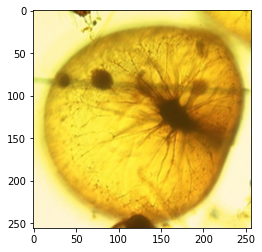

In [7]:
plt.imshow(trainX[0])

(array([21329.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44207.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

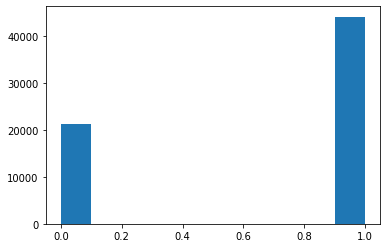

In [8]:
plt.hist(np.ndarray.flatten(trainY[0]))

In [9]:
lcu_net = LCU_Net(debug=False)

Model successfully made!


In [10]:
%%time
h, lcu_net = train(lcu_net)

Epoch 1/50
420/420 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.8666
Epoch 00001: val_loss improved from inf to 0.26953, saving model to ./checkpoints\lcu-net-org-0.27.hdf5
420/420 [==============================] - 50s 96ms/step - loss: 0.3117 - accuracy: 0.8666 - val_loss: 0.2695 - val_accuracy: 0.8814
Epoch 2/50
420/420 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9226
Epoch 00002: val_loss improved from 0.26953 to 0.20722, saving model to ./checkpoints\lcu-net-org-0.21.hdf5
420/420 [==============================] - 40s 95ms/step - loss: 0.1984 - accuracy: 0.9226 - val_loss: 0.2072 - val_accuracy: 0.9086
Epoch 3/50
420/420 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9336
Epoch 00003: val_loss improved from 0.20722 to 0.19411, saving model to ./checkpoints\lcu-net-org-0.19.hdf5
420/420 [==============================] - 40s 95ms/step - loss: 0.1738 - accuracy: 0.9336 - val_loss: 0.1941 - val_accuracy: 

In [11]:
%%time
evaluate(lcu_net)

53/53 [==============================] - 11s 166ms/step - loss: 0.1788 - accuracy: 0.9637
[0.17883440852165222, 0.9636664390563965]
Wall time: 11.2 s


In [11]:
# lcu_net.load_weights('./checkpoints\lcu-net-org-0.12.hdf5')
lcu_net = tf.keras.models.load_model('./lcu_net-org-best3.hdf5')

In [12]:
prediction = lcu_net.predict(testX)

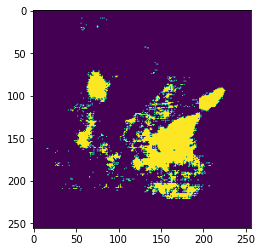

In [32]:
tmp_img = prediction[401].copy()
threshold = 0.1
tmp_img[tmp_img <= threshold] = 0
tmp_img[tmp_img > threshold ] = 1
plt.imshow(tmp_img)

In [13]:
segmented = prediction.copy()
threshold = 0.5
segmented[segmented <= threshold] = 0
segmented[segmented > threshold] = 1

In [20]:
def show(X, Y, segmented, index = -1):
    
    if index > -1:
        plt.imshow(X[index])
        plt.show()
        plt.imshow(Y[index])
        plt.show()
        plt.imshow(segmented[index])
        plt.show()
    else:
        selected_indexes = [4, 3, 5, 13, 18, 25, 55, 369, 401, 57 , 103, 25, 89, 7]
        current_index = 0
        
        fig, ax = plt.subplots(15, 3, figsize = (15, 75))
        ax[0][0].imshow(X[0])
        ax[0][0].set_title('Original Image')
        
        ax[0][1].imshow(Y[0])
        ax[0][1].set_title('Ground Truth')
        
        ax[0][2].imshow(segmented[0])
        ax[0][2].set_title('Predicted image')
        
        for i in range(1, 15):
            for j in range(0, 3):
                if j == 0:
                    ax[i][j].imshow(X[selected_indexes[current_index]])
                elif j == 1:
                    ax[i][j].imshow(Y[selected_indexes[current_index]])
                else:
                    ax[i][j].imshow(segmented[selected_indexes[current_index]])
                    ax[i][j].set_title(selected_indexes[current_index])
            
            current_index += 1
        plt.show()
        

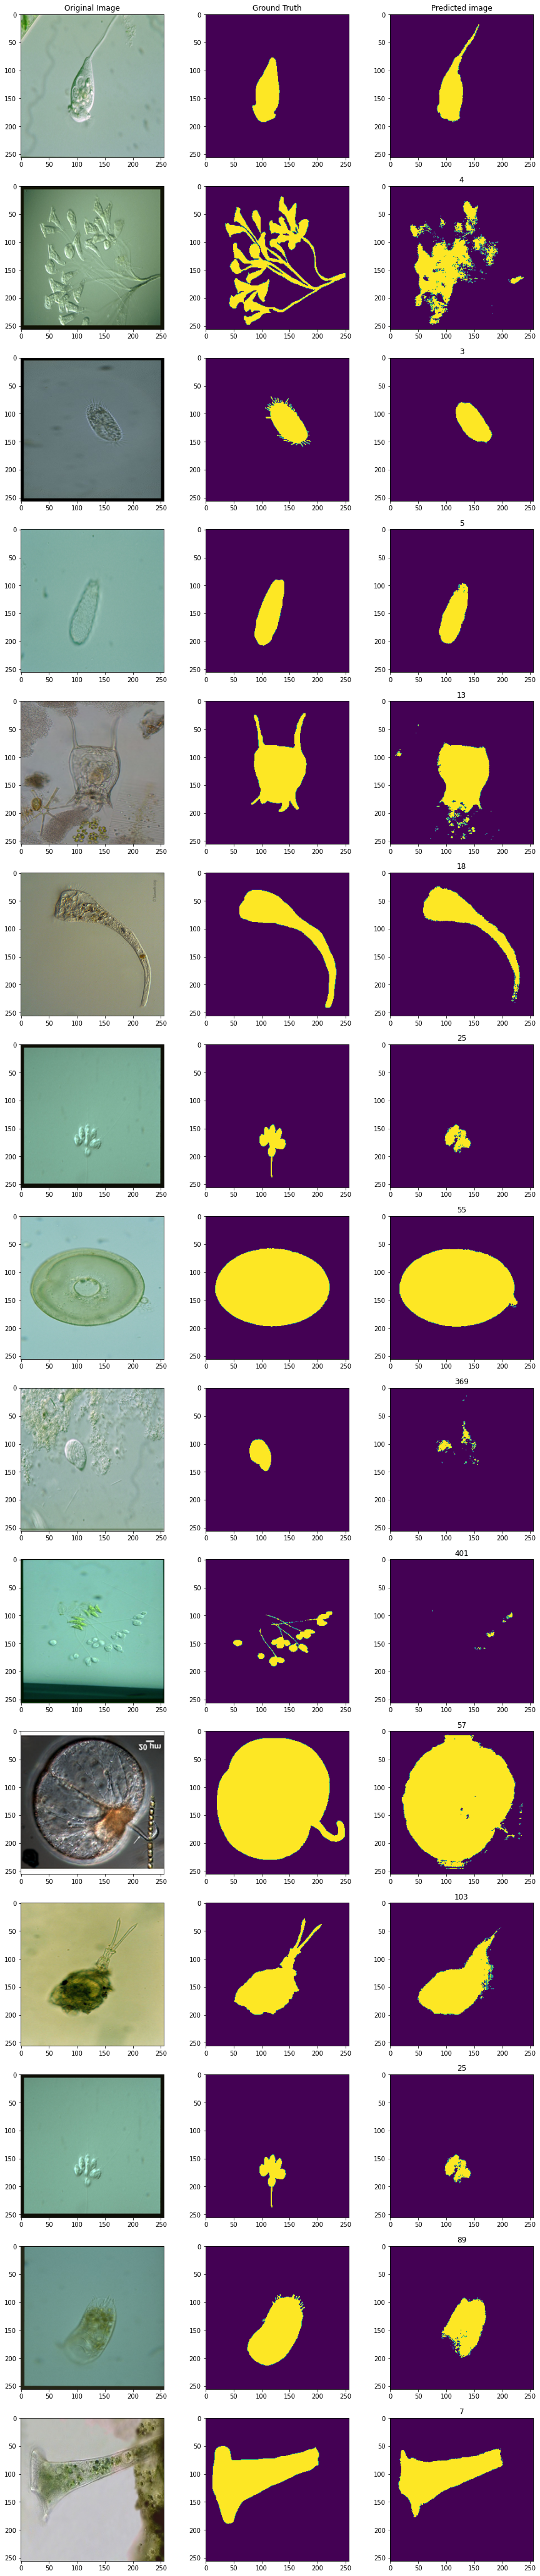

In [21]:
show(testX, testY, segmented)

In [17]:
# pred_mask = tf.argmax(prediction[2], axis=-1)
# pred_mask = pred_mask[..., tf.newaxis]
# plt.imshow(pred_mask[:,:,0])

In [25]:
# lcu_net.save('./lcu_net-org-best3.hdf5')

TypeError: type of argument "units" must be int; got tuple instead